In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split #для разделения датасета на выборку для обучения и тестирования
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #импортируем LDA-функционал
from sklearn.metrics import accuracy_score # для расчета точности 

In [64]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 6,4

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/Mamaevannn/pyda_homeworks/main/final/HR.csv')
# df = pd.read_csv('HR.csv')

In [34]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [36]:
#рассчитываем основные статистики
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [37]:
#рассчитываем моду для всех параметров
df.mode(axis=0).head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


In [38]:
#корреляционная матрица для количественных переменных
df.corr = df[['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours','time_spend_company']].corr()

Text(0.5, 1.0, 'Correlation between variables')

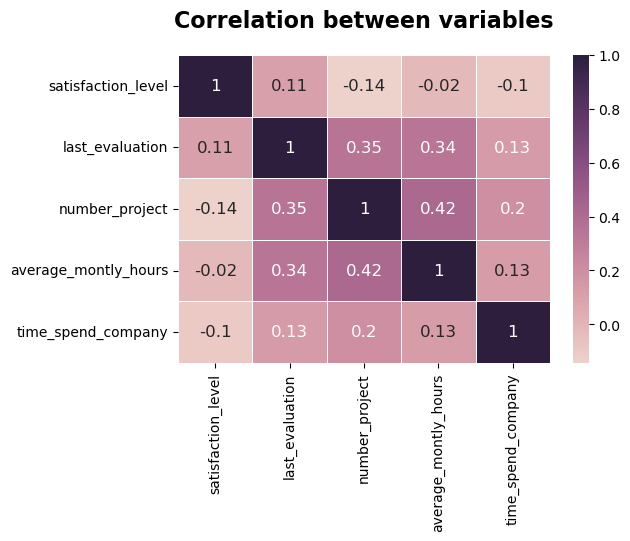

In [65]:
#строим визуализацию
sns.heatmap(df.corr,annot=True, annot_kws={"size": 12},cmap=sns.cubehelix_palette(as_cmap=True),linewidth=.5)
plt.title('Correlation between variables', fontsize=16, fontweight='bold', pad=20)

- 2 наиболее скоррелированных параметра - среднее количество часов на рабочем месте в месяц и количество проектов, выполненных на работе (0.42)  
- 2 наименее скоррелированных параметра - уровень удовлетворенности работой и среднее количество часов на рабочем месте в месяц (-0.02)

In [40]:
# рассчитаем сколько сотрудников работает в каждом департаменте
df_deps = df['department'].value_counts().reset_index().sort_values('department', ascending=False)
df_deps.rename(columns = {'index':'department', 'department':'number_of_employees'}, inplace = True)

In [41]:
df_deps

,department,number_of_employees
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


Наибольшее количество сотрудников работает в департаменте продаж (более 4 тысяч), далее - тех. персонал (2720), поддержка (2229) 

In [42]:
# распределение сотрудников по зарплатам
df_salary = df['salary'].value_counts().reset_index()
df_salary.rename(columns = {'index':'salary', 'salary':'number_of_employees'}, inplace = True)
df_salary['share'] = round(df_salary['number_of_employees']/df_salary['number_of_employees'].sum()*100, 2)
df_salary

,salary,number_of_employees,share
0,low,7316,48.78
1,medium,6446,42.98
2,high,1237,8.25


Text(0.5, 1.0, 'Distribution of employees by salary')

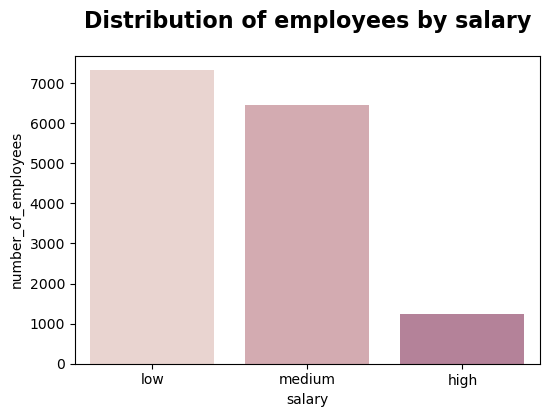

In [66]:
# строим визуализацию
sns.barplot(x=df_salary['salary'], 
            y=df_salary['number_of_employees'], 
            palette=sns.cubehelix_palette())
plt.title('Distribution of employees by salary', fontsize=16, fontweight='bold', pad=20)

In [44]:
# распределение сотрудников по зарплатам в каждом департаменте по отдельности
df_salary_deps = df.groupby(by=['department', 'salary']).count().sort_values('satisfaction_level', ascending=False)['satisfaction_level'].reset_index()
df_salary_deps.rename(columns = { 'satisfaction_level':'number_of_employees'}, inplace = True)

Text(0.5, 1.0, 'Distribution of employees by salary in each demartment')

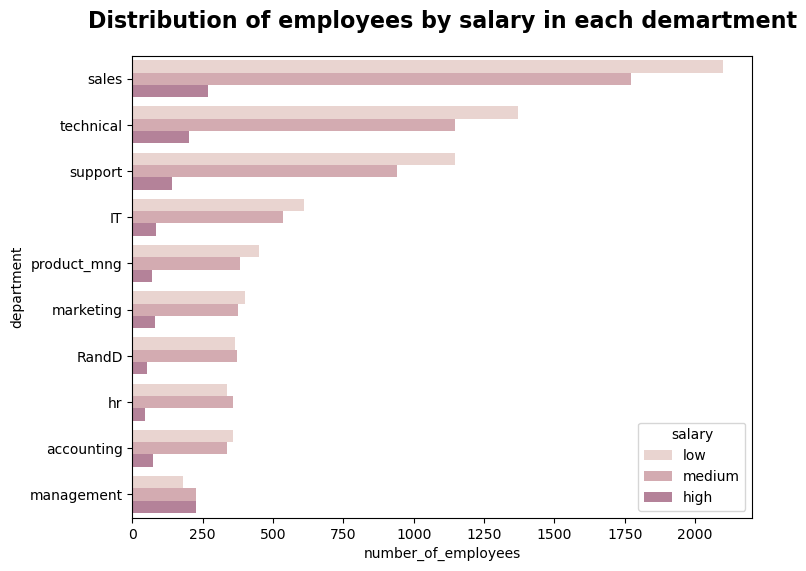

In [45]:
# строим визуализацию
sns.barplot(data=df_salary_deps,
            y='department', 
            x='number_of_employees', 
            hue='salary',
            palette=sns.cubehelix_palette())
plt.title('Distribution of employees by salary in each demartment', fontsize=16, fontweight='bold', pad=20)

В среднем по организации распределение по зарплатам выглядит таким образом: низкие (49%), средние (43%) и высокие (8%).  
Если смотреть в разрезе департаментов, то картина везде более менее схожа с ситуацией по всей организации, за исключением департаментов R&D, HR и Менеджмент. В R&D и HR количество, сотрудников, получающих средние зарплаты выше получающих низкие. А у менеджмента ситуация обратная: меньше всего сотрудников получают низкие зарплаты (около 30%), далее по 35% сотрудников средние и высокие.   

In [46]:
# проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
df.groupby(by='salary').mean()['average_montly_hours'].reset_index()

,salary,average_montly_hours
0,high,199.867421
1,low,200.996583
2,medium,201.338349


Гипотеза не подтвердилась, поскольку все сотрудники, вне зависимости от уровня оклада, проводят на работе примерно одинаковое количество времени (~200ч). Сотрудники с высоким окладом наоборот проводят на работе времени на 1-2 ч в месяц меньше остальных

In [67]:
# датафрейм с уволившимся сотрудниками
df_left = df[df['left'] == 1]
len(df_left)

3571

In [68]:
# датафрейм с неуволившимся сотрудниками
df_stayed = df[df['left'] == 0]
len(df_stayed)

11428

In [49]:
# доля сотрудников с повышением за последние 5 лет среди уволившихся
round(df_left['promotion_last_5years'].value_counts(normalize=True)*100, 2)

0    99.47
1     0.53
Name: promotion_last_5years, dtype: float64

In [50]:
# доля сотрудников с повышением за последние 5 лет среди оставшихся
round(df_stayed['promotion_last_5years'].value_counts(normalize=True)*100, 2)

0    97.37
1     2.63
Name: promotion_last_5years, dtype: float64

По вычисленным данным выше видно, что доля сотрудников с повышением за последние 5 лет среди не уволившихся сотрудников примерно в 5 раз выше, чем среди уволившихся (2.63% против 0.53%)

In [51]:
# средняя степень удовлетворенности среди уволившихся
round(df_left['satisfaction_level'].mean()*100, 2)

44.01

In [52]:
# средняя степень удовлетворенности среди оставшихся
round(df_stayed['satisfaction_level'].mean()*100, 2)

66.68

Вычисления выше подтверждают вполне ожидаемый факт, что степень удовлетворонности среди действующих сотрудников выше, чем среди покинувших компанию (66.7% против 44%) 

In [53]:
# среднее количество проектов среди уволившихся
round(df_left['number_project'].mean()*100)

386

In [54]:
# среднее количество проектов среди оставшихся
round(df_stayed['number_project'].mean()*100)

379

Среднее количество проектов у уволившхся сотрудников оказался немного выше аналогичного показателя среди действующих сотрудников (386 против 379)

- Разделить данные на тестовую и обучающую выборки
- Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
- Оценить качество модели на тестовой выборке

In [55]:
df_predict = df.drop(columns = ['department', 'salary'], axis = 1)

In [56]:
# разделяем данные на тестовую и обучающую выборки
X_train, X_test, y_train, y_test = train_test_split(df_predict, df_predict['left'], test_size=0.30, random_state = 42)

In [58]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) # обучаем данные
lda.predict(X_test) # делаем прогноз на тестовой выборке

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
# проверяем точность прогноза
accuracy_score(y_test, lda.predict(X_test)) # расчет точности 

0.7557777777777778

точность модели составила 76%